In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("apples_and_oranges.csv")
df

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


In [2]:
df.Class.value_counts()

orange    20
apple     20
Name: Class, dtype: int64

In [3]:
df.isna().sum()

Weight    0
Size      0
Class     0
dtype: int64

In [4]:
df.Class=pd.get_dummies(df.Class,sparse=False)

In [5]:
df.head()

,Weight,Size,Class
0,69,4.39,0
1,69,4.21,0
2,65,4.09,0
3,72,5.85,1
4,67,4.70,0


In [6]:
x=df[["Weight","Size"]]
y=df.Class

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)

In [8]:
from sklearn.svm import SVC
svm1=SVC(kernel="linear").fit(xtrain,ytrain)
print(svm1.score(xtrain,ytrain))
print(svm1.score(xtest,ytest))

1.0
0.875


<AxesSubplot:>

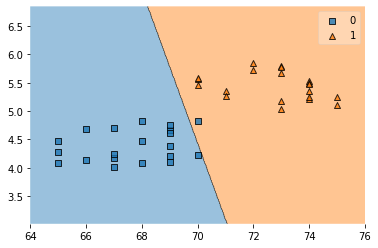

In [9]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(x),y.values,svm1)

In [10]:
# the figure displays Soft Margin since the line of seperator is not exactly discriminating blue and orange
# the data points within the boundary are called slack variables ,here there are two slack variables.

## Non-linear SVM ( ideal for overfitting problem)

In [11]:
svm2=SVC(kernel="rbf").fit(xtrain,ytrain)
#radial basis function is a kernel function(we have a circle of points available)it will help to project one of the variable 
#to a higher dimension on the basis of a square parameter
print(svm2.score(xtrain,ytrain))
print(svm2.score(xtest,ytest))

0.53125
0.375


C:\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


<AxesSubplot:>

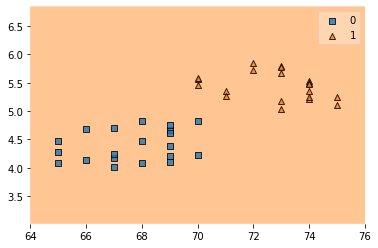

In [12]:
plot_decision_regions(np.array(x),y.values,svm2)

In [13]:
svm3=SVC(kernel="poly",degree=4).fit(xtrain,ytrain)
#polynomial function represents x is represented in a power of more than 2 that is to a higher degree
#default polynomial degree value is 3,it is suggested to have degree greater than 3 bcoz less than 3 makes it rbf
print(svm3.score(xtrain,ytrain))
print(svm3.score(xtest,ytest))

0.90625
1.0


<AxesSubplot:>

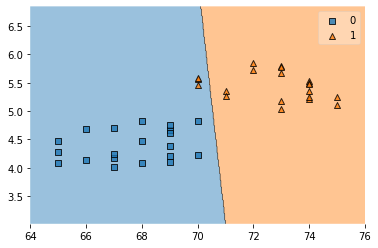

In [14]:
plot_decision_regions(np.array(x),y.values,svm3)

In [15]:
#underfitting problem (kernel adjusted to get a better result.This is known as kernel trick)Result is reversed

In [16]:
svm4=SVC(kernel="sigmoid",degree=4).fit(xtrain,ytrain)
print(svm4.score(xtrain,ytrain))
print(svm4.score(xtest,ytest))

0.53125
0.375


C:\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


<AxesSubplot:>

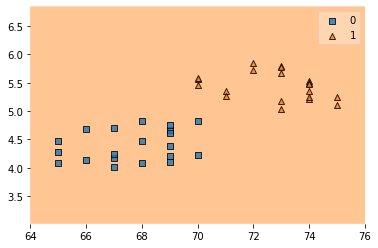

In [17]:
plot_decision_regions(np.array(x),y.values,svm4)

In [20]:
from sklearn.svm import SVC
svm1=SVC(kernel="poly",C=1.0,gamma="scale" ).fit(xtrain,ytrain)
svm1.score(xtrain,ytrain)

0.90625

In [23]:
from sklearn.svm import SVC
svm1=SVC(kernel="poly",C=10,gamma="auto" ).fit(xtrain,ytrain)
svm1.score(xtrain,ytrain)

1.0

In [24]:
c=[5,10,20,30]
gamma=["scale","auto"]

In [28]:
from sklearn.model_selection import GridSearchCV
param={"C":[0.01,0.1,1,10],"gamma":["auto","scale"]}
clf=GridSearchCV(SVC(),param_grid=param)

In [29]:
clf.fit(xtrain,ytrain)
clf.score(xtrain,ytrain)

1.0